## Q1. What is the mathematical formula for a linear SVM?

In [1]:
'''
So now we can say that our that are SVM Error = Margin Error + Classification Error. The higher the margin, the lower would-be margin error, and vice versa
'''

'\nSo now we can say that our that are SVM Error = Margin Error + Classification Error. The higher the margin, the lower would-be margin error, and vice versa\n'

## Q2. What is the objective function of a linear SVM?

In [2]:
'''
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen.'''

'\nThe objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen.'

## Q3. What is the kernel trick in SVM?

In [3]:
'''
The “trick” is that kernel methods represent the data only through a set of pairwise similarity comparisons between the original data observations x (with the original coordinates in the lower dimensional space), instead of explicitly applying the transformations ϕ(x) and representing the data by these transformed
'''

'\nThe “trick” is that kernel methods represent the data only through a set of pairwise similarity comparisons between the original data observations x (with the original coordinates in the lower dimensional space), instead of explicitly applying the transformations ϕ(x) and representing the data by these transformed\n'

## Q4. What is the role of support vectors in SVM Explain with example

In [4]:
'''
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM
'''

'\nSupport vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM\n'

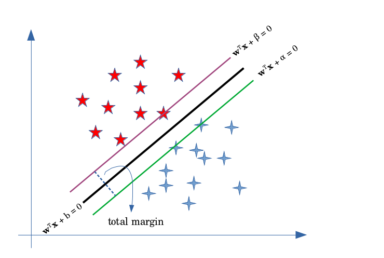

# soft margin
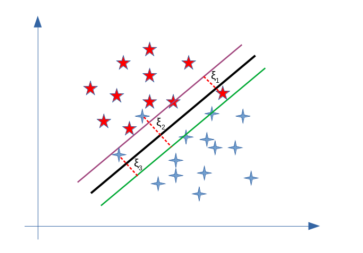

Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [5]:
from sklearn.datasets import load_iris
dataset=load_iris()

In [4]:
import pandas as pd
df=pd.read_csv("iris.csv")

In [5]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [7]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [9]:
df.variety=l.fit_transform(df.variety)

In [10]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [12]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)


SVC(kernel='linear')

In [13]:
svc.coef_

array([[-0.04631136,  0.52105578, -1.0030165 , -0.46411816],
       [-0.00641373,  0.17867392, -0.5389119 , -0.29158729],
       [ 0.57613513,  1.19215085, -2.03465638, -1.67923323]])

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [16]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [17]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5)

In [18]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [19]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [20]:
y_pred2=svc.predict(X_test)
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [23]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [33]:
y_train

4      0
32     0
142    2
85     1
86     1
      ..
71     1
106    2
14     0
92     1
102    2
Name: variety, Length: 112, dtype: int64

In [37]:
X_train['sepal.length']

4      5.0
32     5.2
142    5.8
85     6.0
86     6.7
      ... 
71     6.1
106    4.9
14     5.8
92     5.8
102    7.1
Name: sepal.length, Length: 112, dtype: float64

In [43]:
'''import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train.iloc[:, 0], 
                y=X_train.iloc[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc.coef_[0]           # w consists of 2 elements
b = svc.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
'''   #INCOMPLETE

"import matplotlib.pyplot as plt\nimport seaborn as sns\nimport numpy as np\nplt.figure(figsize=(10, 8))\n# Plotting our two-features-space\nsns.scatterplot(x=X_train.iloc[:, 0], \n                y=X_train.iloc[:, 1], \n                hue=y_train, \n                s=8);\n# Constructing a hyperplane using a formula.\nw = svc.coef_[0]           # w consists of 2 elements\nb = svc.intercept_[0]      # b consists of 1 element\nx_points = np.linspace(-1, 1)    # generating x-points from -1 to 1\ny_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points\n# Plotting a red hyperplane\nplt.plot(x_points, y_points, c='r');\n"